# Gradient Descent

Gradient descent is an iterative optimization algorithm used to minimize a cost or loss function by adjusting the parameters of a model or system. The basic idea behind gradient descent is to move in the direction of steepest descent (the negative gradient) of the cost function to reach a local or global minimum. 


Given a cost or loss function, denoted as $J(\theta)$, where $\theta$ represents a set of parameters that you want to optimize. The goal is to find the values of $\theta$ that minimize $J(\theta)$.

1. **Initialization**:
   Start with an initial guess for the parameters, $\theta_0$. Typically, $\theta_0$ is initialized randomly or with some predetermined values.

2. **Update Rule**:
   In each iteration, you update the parameters $\theta$ as follows:

   $$ \theta_{i+1} = \theta_i - \alpha \nabla J(\theta_i) $$

   where:
   - $\theta_i$ is the current set of parameters.
   - $\alpha$ (alpha) is the learning rate, a hyperparameter that determines the step size in the direction of the gradient.
   - $\nabla J(\theta_i)$ is the gradient of the cost function with respect to the parameters $\theta$.

3. **Stopping Criterion**:
   You continue to update the parameters using the update rule until a stopping criterion is met. Common stopping criteria include:
   - A maximum number of iterations.
   - Achieving a satisfactory level of convergence, which can be defined as a small change in the cost function or a small change in the parameters.

4. **Optimal Parameters**:
   The final values of $\theta$ obtained after the algorithm converges are the optimal parameters that minimize the cost function:

  $$ \theta^* = \text{argmin}(J(\theta)) $$

The key to gradient descent is the calculation of the gradient $\nabla J(\theta)$, which represents the direction of the steepest ascent of the cost function at the current parameter values. The negative gradient $-\nabla J(\theta)$ points in the direction of the steepest descent, which is the direction in which you adjust the parameters to reduce the cost function.

It's important to choose an appropriate learning rate ($\alpha$) for gradient descent. If $\alpha$ is too small, the algorithm may converge very slowly, while if it's too large, it may fail to converge or even diverge. Finding the right learning rate is often an empirical process and can be a challenge in practice.

Gradient descent is a fundamental optimization algorithm used in various machine learning and optimization tasks, including training machine learning models (e.g., linear regression, neural networks), solving linear systems, and more.

**Strengths**:

1. **Versatility**: Gradient descent is a versatile optimization algorithm that can be applied to a wide range of optimization problems.

2. **Efficiency**: It often converges quickly, especially when the cost function $J(\theta)$ is convex or nearly convex. With an appropriate learning rate, it can efficiently find the minimum.

3. **Regularization**: Gradient descent can be extended to include regularization techniques like L1 and L2 regularization, which help prevent overfitting in machine learning models.

4. **Interpretability**: It provides insights into the model parameters, making it possible to interpret the effect of each parameter on the cost function and the model's predictions.

**Weaknesses**:

1. **Sensitivity to Hyperparameters**: Gradient descent requires careful tuning of hyperparameters, such as the learning rate ($\alpha$), which can significantly impact the algorithm's performance. An inappropriate learning rate can lead to slow convergence or divergence.

2. **Local Minima**: In complex, non-convex cost functions, gradient descent can get stuck in local minima instead of finding the global minimum. This issue can be addressed with stochastic gradient descent and variations.

3. **Non-Convex Functions**: Gradient descent may struggle with non-convex cost functions where there are flat regions or plateaus, causing slow convergence or getting stuck.

4. **Gradient Vanishing/Exploding**: In deep neural networks, gradient descent can suffer from the gradient vanishing or exploding problems, especially when using certain activation functions. Techniques like gradient clipping and specialized activations (e.g., ReLU) can mitigate this issue.

5. **Saddle Points**: Gradient descent can be slow when navigating saddle points in the cost function. Advanced optimization techniques like second-order methods or momentum can help overcome this issue.

6. **Large Datasets**: Training deep learning models with large datasets can be computationally intensive, and gradient descent may require a significant amount of time and resources.

7. **Noise Sensitivity**: Gradient descent is sensitive to noisy gradients, which can be problematic in some real-world scenarios. Stochastic gradient descent and mini-batch gradient descent are often used to mitigate this problem.

8. **Local Minimum Avoidance**: In cases where local minima are a concern, techniques such as stochastic gradient descent, mini-batch gradient descent, and adaptive learning rate methods can be used to explore a wider parameter space.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Example Code


1. Given simple quadratic cost function 

$$ J(\theta) = \theta^2+2\theta+100 $$ 

for which we want to find the minimum.

In [2]:
# Define the quadratic function J(\theta) = \theta^2+2\theta+100
def quadratic_cost_function(theta):
    return theta**2+2*theta+100


2. The gradient of the function, 

$$ J'(\theta) = 2\theta $$ 

which is used in the gradient descent update.

In [3]:
# Define the derivative of the quadratic function f'(x) = 2x
def gradient(theta):
    return 2 * theta+2

3. The learning rate $\alpha$ and the number of max iterations for the gradient descent.

In [4]:
# Gradient Descent parameters
learning_rate = 0.1  # Step size or learning rate


4. Choose an initial guess for $ \theta_0 $.

In [5]:
# Initial guess
theta_0 = 10.0


5. The gradient descent function iteratively updates $ \theta $ using the gradient and learning rate and appends the updated values to the history lists,

 $$ \theta_{i+1} = \theta_i - \alpha 2(\theta_i) $$


In [6]:
def gradient_descent(theta,learning_rate=0.1, tol=1e-6, max_iter=100):
    theta_history = [theta]
    cost_history = [quadratic_cost_function(theta)]
    for i in range(max_iter):
        # Update x using the gradient and learning rate
        theta_new = theta - learning_rate * gradient(theta)

        # Append the updated values to the history lists
        theta_history.append(theta_new)
        cost_history.append(quadratic_cost_function(theta_new))
        if abs(theta-theta_new) < tol:
            return theta,theta_history, cost_history,i
        theta=theta_new

    return theta,theta_history, cost_history,i

6. Choose the stopping criteria tol and max iteratinos such that the algorithms stops when the parameter converges to within a tolerance 

$$|\theta_{i+1}-\theta_{i}|<tol$$

or the number of iterations reaches the max iterations. 


In [7]:
tol=0.001
max_iterations = 100     # Number of iterations


7. Run the function and print the optimal value found by gradient descent of $ \theta $, the minimum value of the cost function $ J(\theta) $ and the number of iterations $I$.



In [8]:
theta, theta_history, cost_history,I=gradient_descent(theta_0,learning_rate=learning_rate,tol=tol,max_iter=max_iterations)
# Print the final result
print(f'Optimal theta: {theta}')
print(f"Minimum Cost value: {quadratic_cost_function(theta)}")
print(f"Number of Interations I: {I}")

Optimal theta: -0.9955378698871966
Minimum Cost value: 99.00001991060515
Number of Interations I: 35


8. Plotting the function 
$$ J(\theta) $$
and the optimization path taken by gradient descent.

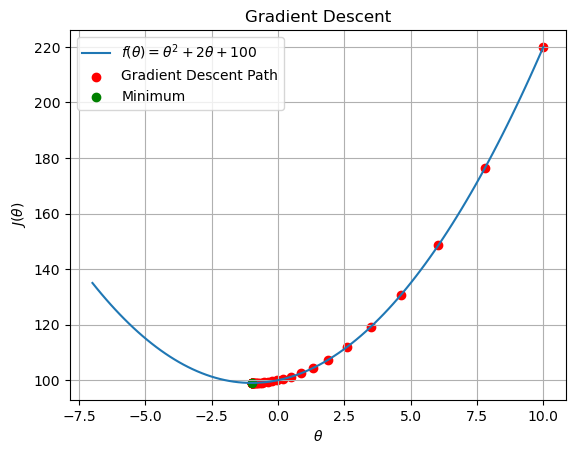

In [9]:
# Perform gradient descent
# Plot the function and optimization path

theta_values = np.linspace(-7, 10, 100)
cost_values = quadratic_cost_function(theta_values)


plt.plot(theta_values, cost_values, label=r'$f(\theta) = \theta^2+2\theta+100$')
plt.scatter(theta_history, cost_history, c='red', label='Gradient Descent Path')
plt.scatter(theta, quadratic_cost_function(theta), c='g', label='Minimum')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$J(\theta)$')
plt.legend()
plt.grid(True)
plt.title('Gradient Descent')
plt.show()

9. Plotting  $ \theta $ as a function of itertations (i).

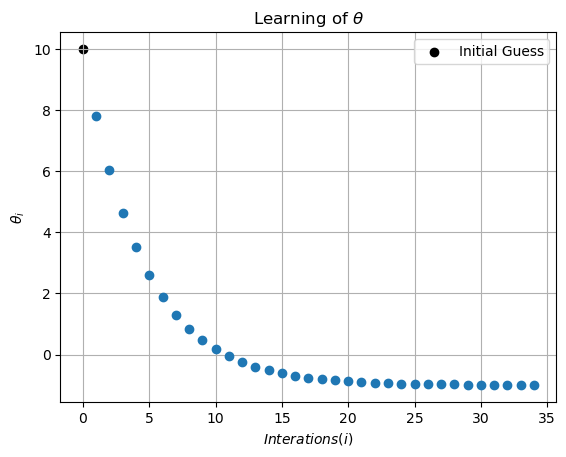

In [10]:
plt.scatter(0,theta_history[0],  c='k', label='Initial Guess')
plt.plot(np.arange(1,I),theta_history[1:I],'o')
plt.xlabel(r'$Interations (i)$')
plt.ylabel(r'$\theta_i$')
plt.legend()
plt.grid(True)
plt.title(r'Learning of $\theta$')
plt.show()

10. Showing the converge of $\theta$ by plotting $|\theta_{i+1}-\theta_{i}|$ as a function of itertations (i).

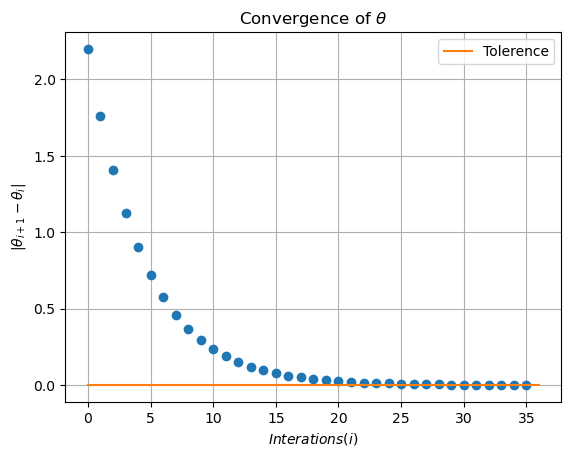

In [11]:
plt.plot(np.abs(np.diff(theta_history)),'o')
plt.plot([0,I+1],[tol,tol],label='Tolerence')
plt.xlabel(r'$Interations (i)$')
plt.ylabel(r'$|\theta_{i+1}-\theta_{i}|$')
plt.legend()
plt.grid(True)
plt.title(r'Convergence of $\theta$')
plt.show()


### Playing with Learning Rate

Optimal theta: -1.0
Minimum Cost value: 99.0
Number of Interations I: 1


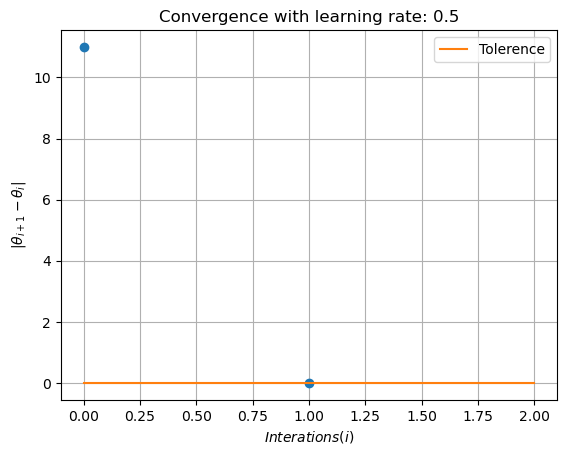

In [20]:
alpha=0.5
theta, theta_history, cost_history,I=gradient_descent(theta_0,learning_rate=alpha,tol=tol,max_iter=max_iterations)
# Print the final result
print(f'Optimal theta: {theta}')
print(f"Minimum Cost value: {quadratic_cost_function(theta)}")
print(f"Number of Interations I: {I}")

plt.plot(np.abs(np.diff(theta_history)),'o')
plt.plot([0,I+1],[tol,tol],label='Tolerence')
plt.xlabel(r'$Interations (i)$')
plt.ylabel(r'$|\theta_{i+1}-\theta_{i}|$')
plt.legend()
plt.grid(True)
plt.title(f'Convergence with learning rate: {alpha}')
plt.show()


Optimal theta: 3.0263557540055266
Minimum Cost value: 115.21154065781342
Number of Interations I: 99


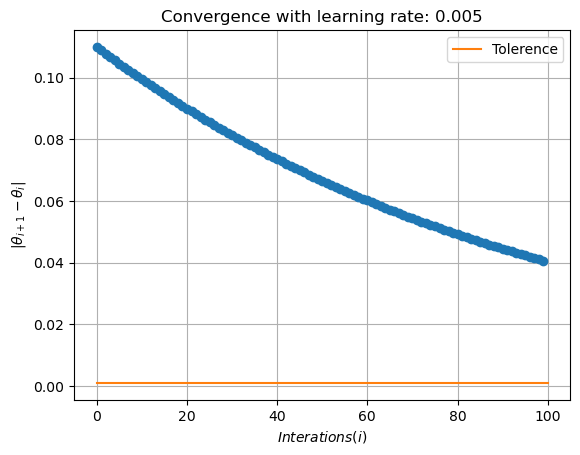

In [21]:
alpha=0.005
theta, theta_history, cost_history,I=gradient_descent(theta_0,learning_rate=alpha,tol=tol,max_iter=max_iterations)
# Print the final result
print(f'Optimal theta: {theta}')
print(f"Minimum Cost value: {quadratic_cost_function(theta)}")
print(f"Number of Interations I: {I}")

plt.plot(np.abs(np.diff(theta_history)),'o')
plt.plot([0,I+1],[tol,tol],label='Tolerence')
plt.xlabel(r'$Interations (i)$')
plt.ylabel(r'$|\theta_{i+1}-\theta_{i}|$')
plt.legend()
plt.grid(True)
plt.title(f'Convergence with learning rate: {alpha}')
plt.show()